In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, chi2
from yellowbrick.model_selection import rfecv
from sklearn import tree
import ppscore as ps
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (8,4)
plt.rcParams['figure.dpi'] = 250
plt.show()

In [2]:
df = pd.read_csv("D:\ExcelR_Assignments\Random_Forest\Datasets\Company_Data.csv")
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,400.0,7.496325,2.824115,0.0,5.39,7.49,9.32,16.27
CompPrice,400.0,124.975000,15.334512,77.0,115.00,125.00,135.00,175.00
Income,400.0,68.657500,27.986037,21.0,42.75,69.00,91.00,120.00
Advertising,400.0,6.635000,6.650364,0.0,0.00,5.00,12.00,29.00
Population,400.0,264.840000,147.376436,10.0,139.00,272.00,398.50,509.00
Price,400.0,115.795000,23.676664,24.0,100.00,117.00,131.00,191.00
Age,400.0,53.322500,16.200297,25.0,39.75,54.50,66.00,80.00
Education,400.0,13.900000,2.620528,10.0,12.00,14.00,16.00,18.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
df.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

<Axes: >

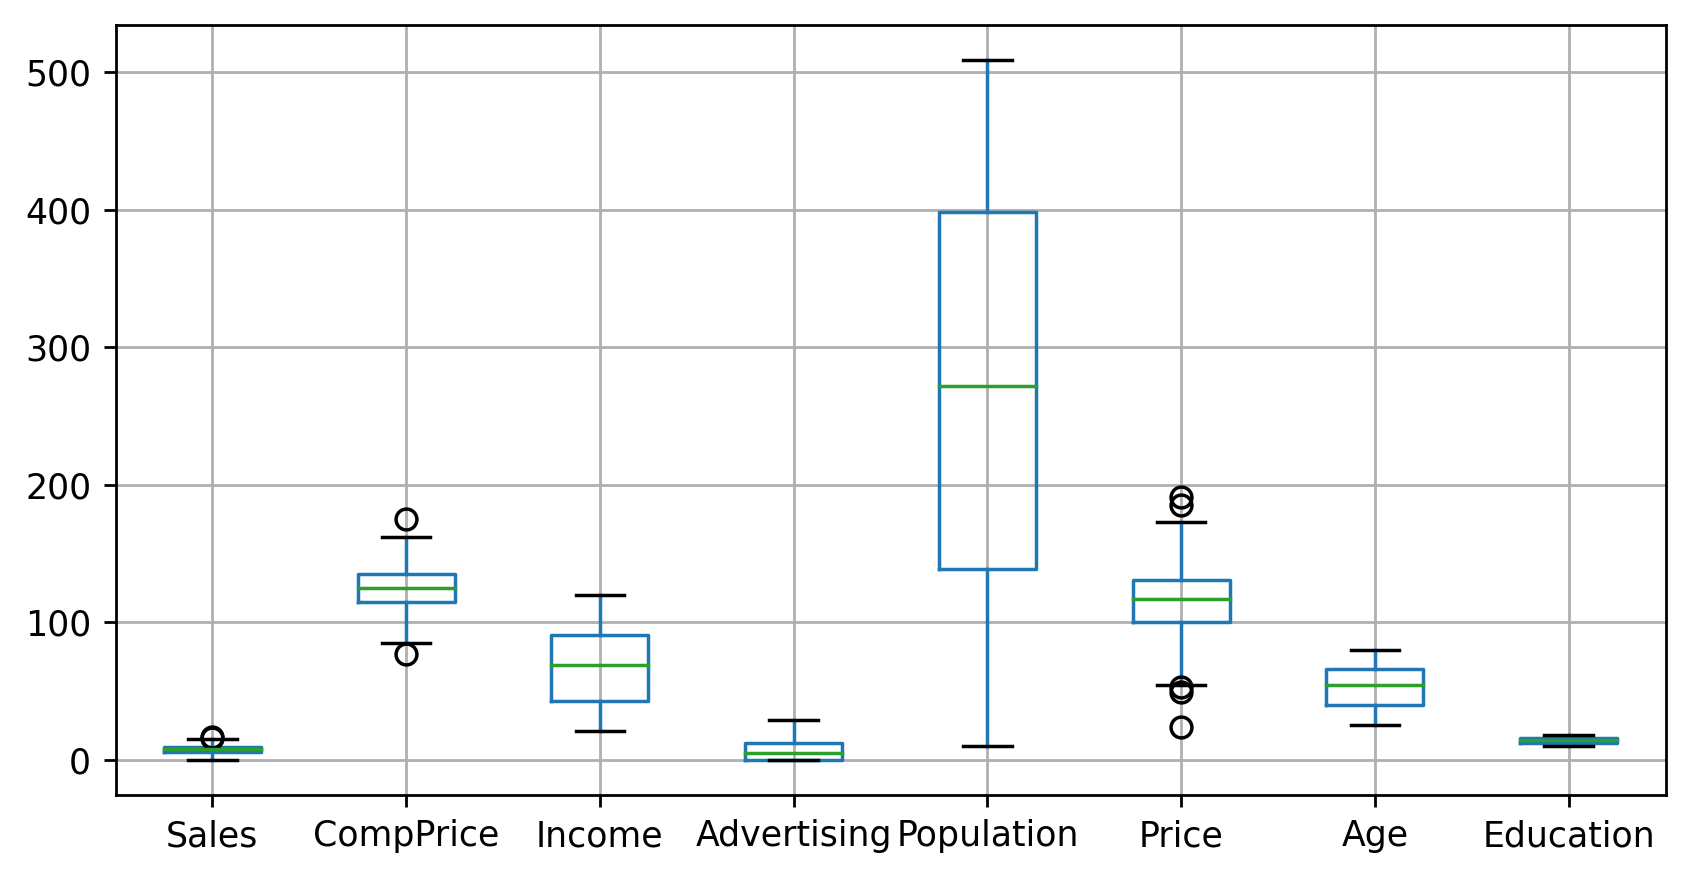

In [6]:
df.boxplot()

In [7]:
# Converting numerical column to categorical

In [8]:
threshold = 7.496325
df['Sales'] = pd.cut(df['Sales'], bins=[float('-inf'), threshold, float('inf')], labels=['low', 'high'])

In [9]:
# Converting categorical features into numerical

In [10]:
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [11]:
df = pd.get_dummies(columns = ['ShelveLoc', 'Urban', 'US'], data = df)
df

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,high,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,high,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,high,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,low,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,low,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,high,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,low,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,low,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,low,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [12]:
# Isolation forest for detecting outliers

In [13]:
data = df.drop(columns = 'Sales')
iso = IsolationForest()
iso.fit(data)

IsolationForest()

In [14]:
outliers = iso.predict(data)
outliers

array([ 1, -1,  1,  1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        1, -1,  1,  1, -1, -1, -1,  1, -1, -1, -1,  1, -1, -1,  1, -1,  1,
        1, -1, -1,  1,  1, -1, -1, -1, -1,  1,  1,  1, -1,  1, -1, -1, -1,
       -1, -1,  1, -1,  1,  1, -1, -1, -1, -1, -1, -1,  1, -1,  1, -1,  1,
       -1,  1, -1, -1,  1, -1,  1, -1,  1, -1,  1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1, -1, -1,  1, -1,  1,  1,  1, -1, -1, -1, -1, -1,  1,
       -1, -1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1, -1,  1, -1, -1, -1, -1,  1,  1, -1,  1, -1,  1,  1,  1, -1,
       -1,  1,  1, -1,  1, -1,  1, -1, -1,  1, -1, -1, -1,  1, -1, -1, -1,
       -1,  1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1,  1,  1,  1, -1,
        1, -1, -1,  1, -1, -1, -1,  1, -1, -1, -1,  1, -1,  1, -1,  1, -1,
       -1,  1, -1,  1, -1, -1, -1,  1,  1, -1,  1,  1,  1, -1,  1, -1, -1,
        1, -1, -1, -1, -1, -1, -1,  1,  1,  1, -1, -1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1

In [15]:
data['Outliers'] = outliers
data[data['Outliers']==-1]

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,Outliers
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1,-1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0,-1
5,124,113,13,501,72,78,16,1,0,0,1,0,0,1,-1
8,132,110,0,108,124,76,10,0,0,1,1,0,1,0,-1
9,132,113,0,131,124,76,17,0,0,1,1,0,0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,130,58,19,366,139,33,16,1,0,0,0,1,0,1,-1
395,138,108,17,203,128,33,14,0,1,0,0,1,0,1,-1
396,139,23,3,37,120,55,11,0,0,1,1,0,0,1,-1
397,162,26,12,368,159,40,18,0,0,1,0,1,0,1,-1


There are lots of outliers present in dataset
Outliers are more than 3% so we are not deleting them because deleting them will make huge loss of data to train model. 
So we will keep optliers as it is 

In [16]:
df.corr()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
CompPrice,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197,-0.035393,0.026386,0.008683,-0.066594,0.066594,-0.016869,0.016869
Income,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855,0.072017,-0.012657,-0.051392,-0.037967,0.037967,-0.089601,0.089601
Advertising,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594,-0.035217,0.056149,-0.015929,-0.042035,0.042035,-0.684460,0.684460
Population,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378,0.039902,0.007789,-0.040640,0.052025,-0.052025,-0.060564,0.060564
Price,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747,-0.036220,0.045854,-0.006607,-0.047016,0.047016,-0.057861,0.057861
Age,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488,-0.044123,-0.022818,0.056613,-0.028479,0.028479,-0.008652,0.008652
Education,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000,0.012525,-0.029188,0.013242,0.033094,-0.033094,0.078250,-0.078250
ShelveLoc_Bad,-0.035393,0.072017,-0.035217,0.039902,-0.036220,-0.044123,0.012525,1.000000,-0.291913,-0.618133,-0.081122,0.081122,-0.000979,0.000979
ShelveLoc_Good,0.026386,-0.012657,0.056149,0.007789,0.045854,-0.022818,-0.029188,-0.291913,1.000000,-0.571396,0.039197,-0.039197,-0.078864,0.078864
ShelveLoc_Medium,0.008683,-0.051392,-0.015929,-0.040640,-0.006607,0.056613,0.013242,-0.618133,-0.571396,1.000000,0.037391,-0.037391,0.065656,-0.065656


<Axes: >

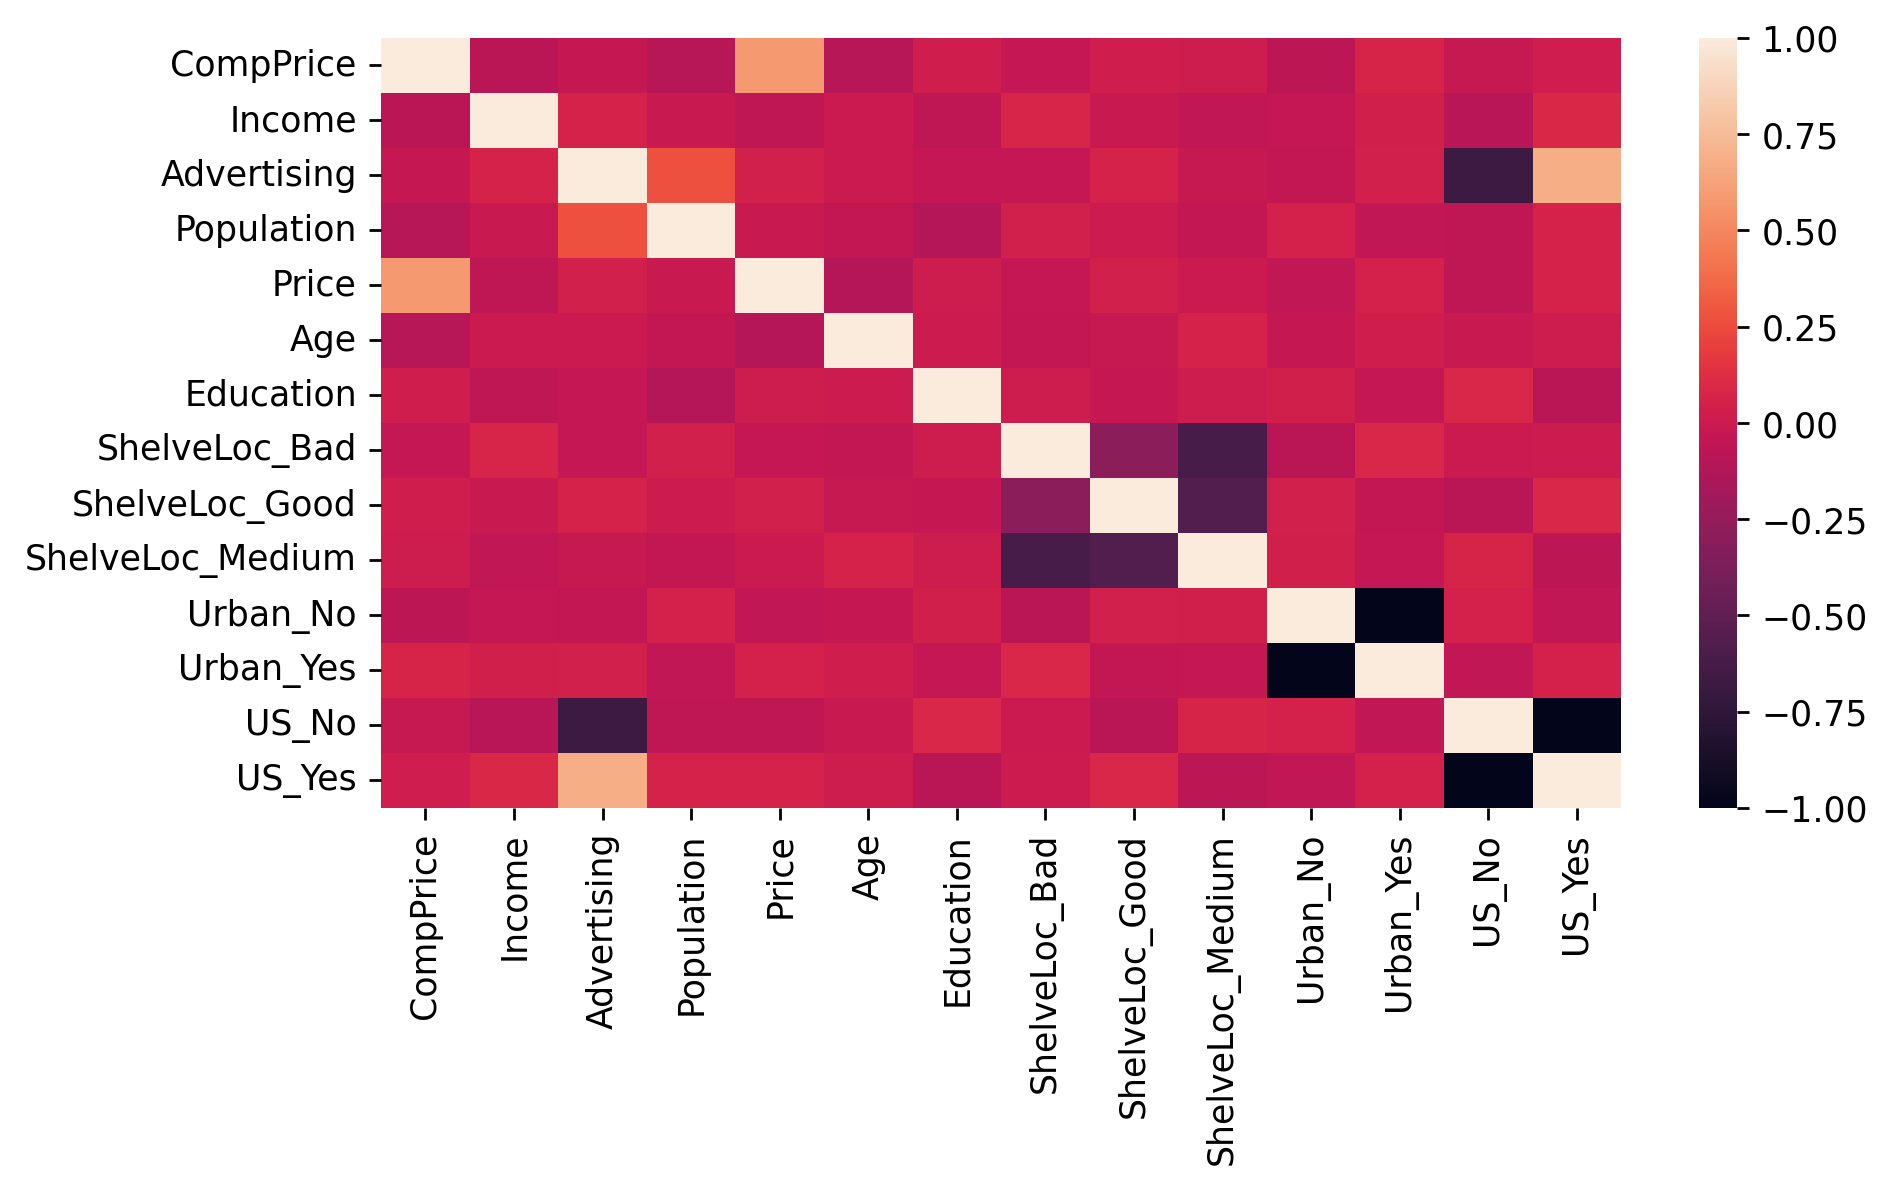

In [19]:
sns.heatmap(df.corr())

In [20]:
# Using PPS (Predictive Power Score)

In [22]:
feature_sel = ps.matrix(df)
feature_sel

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Sales,Sales,1.000000,predict_itself,True,None,0.0000,1.000000,None
1,Sales,CompPrice,0.000000,regression,True,mean absolute error,12.2150,12.225131,DecisionTreeRegressor()
2,Sales,Income,0.003213,regression,True,mean absolute error,23.6325,23.556575,DecisionTreeRegressor()
3,Sales,Advertising,0.043913,regression,True,mean absolute error,5.7300,5.478376,DecisionTreeRegressor()
4,Sales,Population,0.000000,regression,True,mean absolute error,127.0450,128.132781,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
220,US_Yes,ShelveLoc_Medium,0.000000,regression,True,mean absolute error,0.4525,0.496345,DecisionTreeRegressor()
221,US_Yes,Urban_No,0.000000,regression,True,mean absolute error,0.2950,0.416724,DecisionTreeRegressor()
222,US_Yes,Urban_Yes,0.000000,regression,True,mean absolute error,0.2950,0.416724,DecisionTreeRegressor()
223,US_Yes,US_No,1.000000,regression,True,mean absolute error,0.3550,0.000000,DecisionTreeRegressor()


In [23]:
feature_sel[feature_sel['y'] == 'Sales']

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Sales,Sales,1.000000,predict_itself,True,None,0.00,1.000000,None
15,CompPrice,Sales,0.000000,classification,True,weighted F1,0.53,0.453366,DecisionTreeClassifier()
30,Income,Sales,0.000000,classification,True,weighted F1,0.53,0.504860,DecisionTreeClassifier()
45,Advertising,Sales,0.142484,classification,True,weighted F1,0.53,0.596967,DecisionTreeClassifier()
60,Population,Sales,0.000000,classification,True,weighted F1,0.53,0.410668,DecisionTreeClassifier()
75,Price,Sales,0.138027,classification,True,weighted F1,0.53,0.594873,DecisionTreeClassifier()
90,Age,Sales,0.025014,classification,True,weighted F1,0.53,0.541757,DecisionTreeClassifier()
105,Education,Sales,0.000000,classification,True,weighted F1,0.53,0.430904,DecisionTreeClassifier()
120,ShelveLoc_Bad,Sales,0.126151,classification,True,weighted F1,0.53,0.589291,DecisionTreeClassifier()
135,ShelveLoc_Good,Sales,0.183990,classification,True,weighted F1,0.53,0.616475,DecisionTreeClassifier()


Here we can see the columns important for model building w.r.t target column are "Advertising", "Price", "ShelveLoc_Bad", 'ShelveLoc_Good', etc.
According to PPS - Selecting only these columns can also create a strong model

In [25]:
# recursive Feature Elimination (RFE) for feature selection

In [27]:
df.head(2)

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,high,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,high,111,48,16,260,83,65,10,0,1,0,0,1,0,1


In [146]:
x = df.iloc[:, 1:]
y = df['Sales']

In [32]:
# A. Chi2 test

In [33]:
chi_test = SelectKBest(score_func = chi2, k = 5)
chi_test.fit(x, y)
chi_test.scores_

array([9.50257853e-01, 6.93776038e+01, 1.68776764e+02, 1.57269749e+02,
       2.97238364e+02, 6.84588265e+01, 1.64040072e-01, 2.35229881e+01,
       4.15461048e+01, 6.47180677e-01, 6.25338515e-01, 2.61666471e-01,
       5.24480788e+00, 2.88667721e+00])

In [35]:
chi_table = pd.DataFrame({
    'features' : x.columns,
    'Chi_stat_val' : chi_test.scores_
})
chi_table.sort_values(by = 'Chi_stat_val', ascending = False)

,features,Chi_stat_val
4,Price,297.238364
2,Advertising,168.776764
3,Population,157.269749
1,Income,69.377604
5,Age,68.458826
8,ShelveLoc_Good,41.546105
7,ShelveLoc_Bad,23.522988
12,US_No,5.244808
13,US_Yes,2.886677
0,CompPrice,0.950258


PPS told that "Advertising", "Price", "ShelveLoc_Bad", 'ShelveLoc_Good' these columns are important
-----Chi2 says that "Advertising", "Price", "ShelveLoc_Bad", 'ShelveLoc_Good', 'Population', 'income', 'Age' are also important 

In [37]:
# B. RFE method

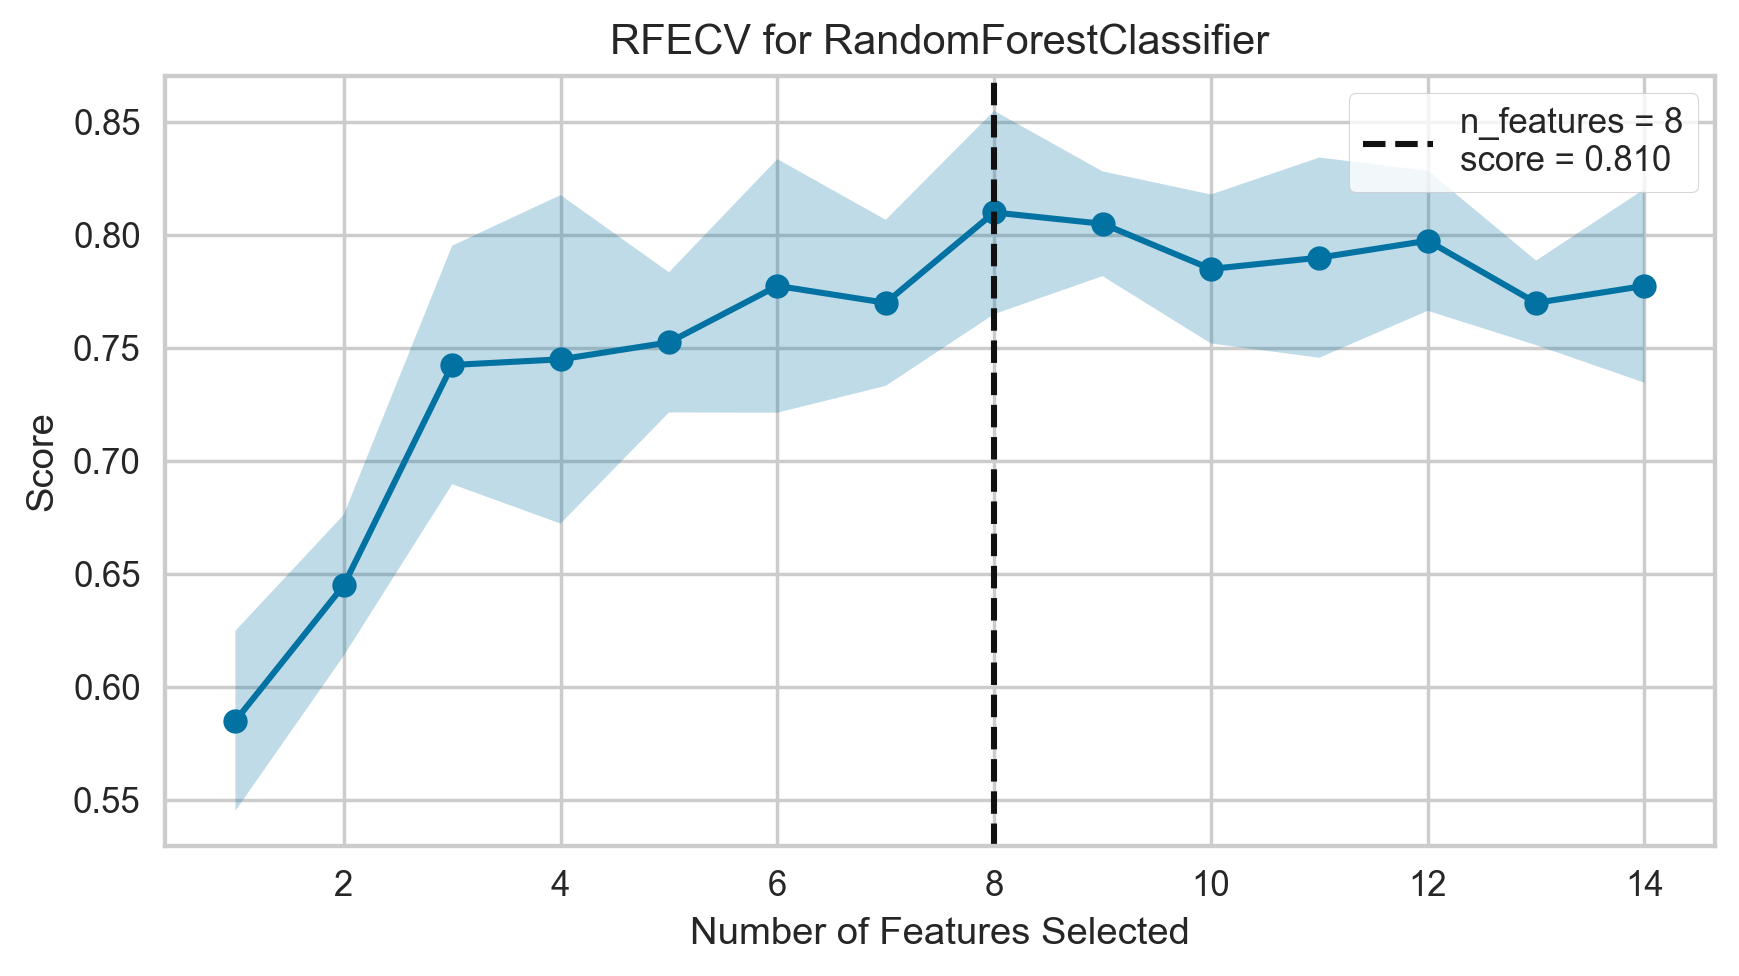

In [38]:
rfe = rfecv(RandomForestClassifier(), x, y)

In [39]:
rfe.ranking_

array([1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 7, 4, 5, 6])

In [40]:
rfe_sel = pd.DataFrame({
    'features' : x.columns,
    'rfe_rank' : rfe.ranking_
})
rfe_sel[rfe_sel['rfe_rank'] == 1]

,features,rfe_rank
0,CompPrice,1
1,Income,1
2,Advertising,1
3,Population,1
4,Price,1
5,Age,1
7,ShelveLoc_Bad,1
8,ShelveLoc_Good,1


Here RFE says - compprice, income, advertising, population, price, age, shelveloc columns are important

In [42]:
# C. Tree Based Method

In [43]:
dt = DecisionTreeClassifier()
dt.fit(x, y)
dt.feature_importances_

array([0.13669682, 0.10315097, 0.13057812, 0.04976549, 0.30742395,
       0.07322635, 0.03089732, 0.        , 0.1318924 , 0.01417039,
       0.01511466, 0.00500013, 0.        , 0.00208339])

In [131]:
dt_ig_sel = pd.DataFrame({
    'features' : x.columns,
    'info_gain' : dt.feature_importances_
})
dt_ig_sel.sort_values(by = 'info_gain', ascending = False)

,features,info_gain
4,Price,0.307424
0,CompPrice,0.136697
8,ShelveLoc_Good,0.131892
2,Advertising,0.130578
1,Income,0.103151
5,Age,0.073226
3,Population,0.049765
6,Education,0.030897
10,Urban_No,0.015115
9,ShelveLoc_Medium,0.014170


Here info gain for price, compprice, shelveloc, advertising, income columns is high so they are important features to predict sales

According to- 
1. PPS = "Advertising", "Price", "ShelveLoc_Bad", 'ShelveLoc_Good'
2. chi2 =  "Advertising", "Price", "ShelveLoc_Bad", 'ShelveLoc_Good', 'Population', 'income', 'Age
3. RFE = 'Advertising', 'Price', 'ShelveLoc_Good', 'ShelveLoc_Bad' 'Population', 'income', 'Age
4. Tree method = "Advertising", "Price", "Population", 'Education', 'ShelveLoc_Good', 'compprice', 'income', 'age' are important features.

In [48]:
# Common features are - advertising, price, shelveloc, population, income, age

In [49]:
# Baseline classification model with all features

In [50]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [51]:
rfc = RandomForestClassifier()
rfc.fit(xtrain, ytrain)
yp = rfc.predict(xtest)
yp

array(['low', 'low', 'high', 'low', 'high', 'low', 'high', 'high', 'high',
       'high', 'low', 'high', 'high', 'high', 'high', 'high', 'high',
       'high', 'high', 'low', 'high', 'low', 'low', 'low', 'low', 'low',
       'low', 'high', 'low', 'low', 'high', 'high', 'low', 'low', 'high',
       'low', 'low', 'high', 'high', 'low', 'low', 'low', 'high', 'high',
       'high', 'high', 'low', 'high', 'low', 'low', 'high', 'high', 'low',
       'high', 'high', 'low', 'low', 'high', 'high', 'high', 'high',
       'high', 'low', 'low', 'high', 'low', 'high', 'high', 'low', 'high',
       'low', 'low', 'high', 'low', 'high', 'low', 'low', 'high', 'low',
       'high'], dtype=object)

In [55]:
print(classification_report(ytest, yp))

              precision    recall  f1-score   support

        high       0.84      0.84      0.84        43
         low       0.81      0.81      0.81        37

    accuracy                           0.82        80
   macro avg       0.82      0.82      0.82        80
weighted avg       0.82      0.82      0.82        80



In [58]:
print(confusion_matrix(ytest, yp))

[[36  7]
 [ 7 30]]


In [59]:
print('Training Accuracy =', rfc.score(xtrain, ytrain))
print('Testing Accuracy =', rfc.score(xtest, ytest))

Training Accuracy = 1.0
Testing Accuracy = 0.825


In [127]:
rfc.feature_importances_

array([0.1013891 , 0.09479985, 0.09066379, 0.09884615, 0.24132292,
       0.12860482, 0.05603772, 0.04223296, 0.0721599 , 0.02384233,
       0.01319654, 0.01446398, 0.01171697, 0.01072298])

In [147]:
rfc_ig_sel = pd.DataFrame({
    'features' : x.columns,
    'info_gain' : rfc.feature_importances_
})
rfc_ig_sel = rfc_ig_sel.sort_values(by = 'info_gain', ascending = False)
rfc_ig_sel

,features,info_gain
4,Price,0.241323
5,Age,0.128605
0,CompPrice,0.101389
3,Population,0.098846
1,Income,0.094800
2,Advertising,0.090664
8,ShelveLoc_Good,0.072160
6,Education,0.056038
7,ShelveLoc_Bad,0.042233
9,ShelveLoc_Medium,0.023842


In [60]:
# Visualizing tree

In [61]:
x.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age',
       'Education', 'ShelveLoc_Bad', 'ShelveLoc_Good', 'ShelveLoc_Medium',
       'Urban_No', 'Urban_Yes', 'US_No', 'US_Yes'],
      dtype='object')

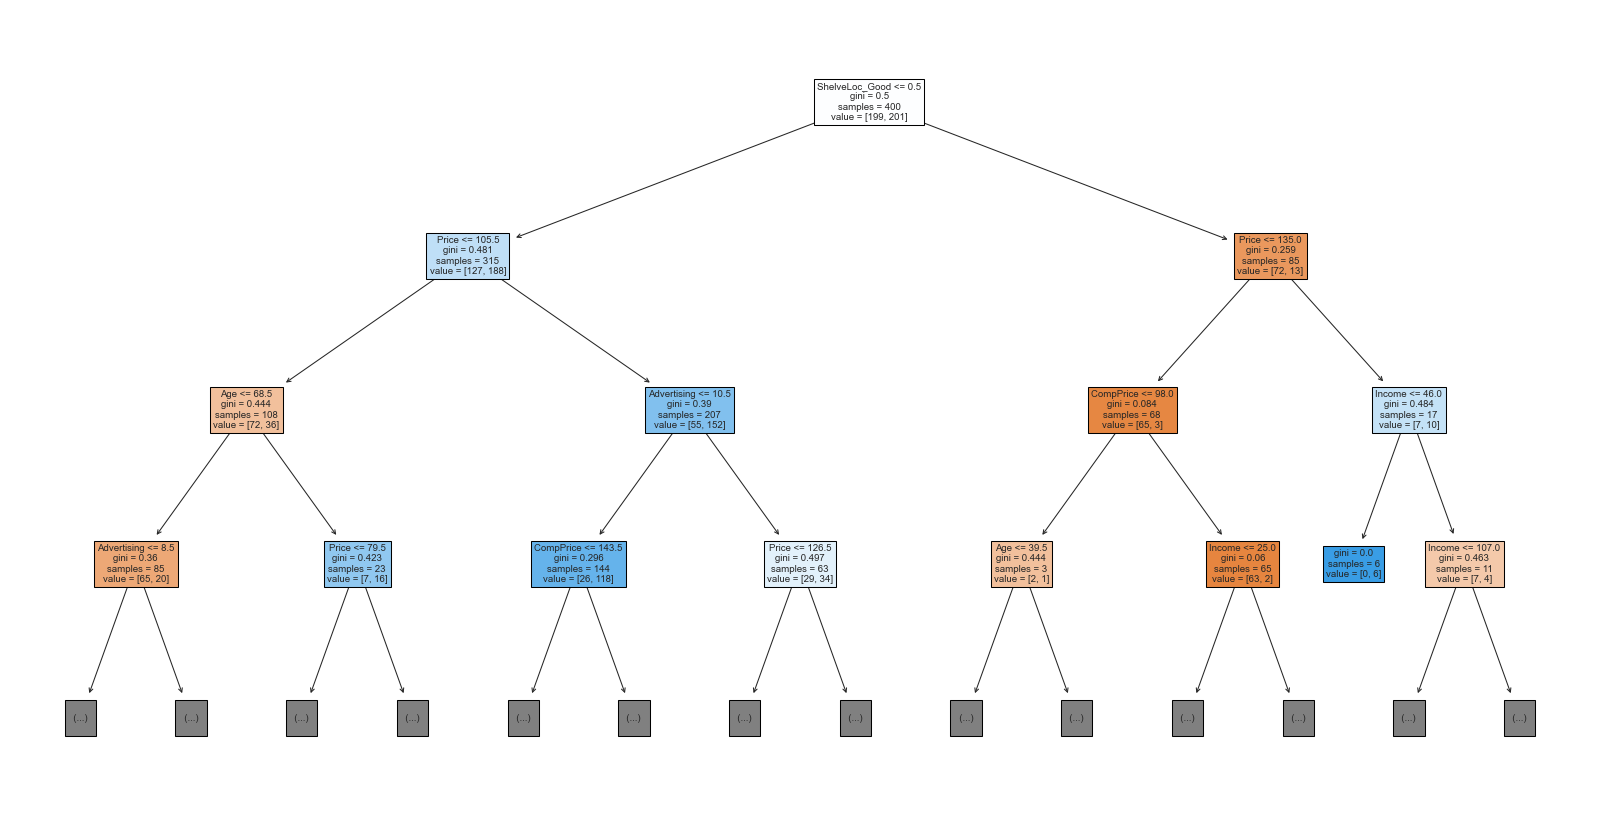

In [66]:
tree.plot_tree(dt, feature_names= ['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age','Education', 
                                   'ShelveLoc_Bad', 'ShelveLoc_Good', 'ShelveLoc_Medium', 'Urban_No', 'Urban_Yes', 'US_No', 
                                   'US_Yes'], filled=True, max_depth=3)
plt.show()

So the important factors causing high sales as per baseline model are - ShelveLoc, Price, Age, Advertising, income and compprice

In [68]:
# Creating model by selecting important features of PPS method.

In [69]:
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education', 'ShelveLoc_Bad', 'ShelveLoc_Good',
       'ShelveLoc_Medium', 'Urban_No', 'Urban_Yes', 'US_No', 'US_Yes'],
      dtype='object')

In [149]:
x = df[['Advertising', 'Price', 'ShelveLoc_Bad', 'ShelveLoc_Good']]
y = df['Sales']

In [76]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [77]:
pps_rfc = RandomForestClassifier()
pps_rfc.fit(xtrain, ytrain)
yp_pps = pps_rfc.predict(xtest)
yp_pps

array(['high', 'low', 'high', 'low', 'low', 'low', 'high', 'low', 'high',
       'low', 'low', 'high', 'high', 'low', 'high', 'high', 'high',
       'high', 'low', 'low', 'high', 'low', 'high', 'low', 'low', 'low',
       'low', 'low', 'high', 'low', 'high', 'high', 'low', 'low', 'high',
       'low', 'low', 'high', 'high', 'low', 'low', 'low', 'high', 'high',
       'low', 'high', 'low', 'high', 'low', 'low', 'high', 'low', 'low',
       'high', 'high', 'low', 'low', 'high', 'high', 'high', 'high',
       'high', 'high', 'low', 'low', 'high', 'high', 'low', 'low', 'high',
       'low', 'low', 'high', 'low', 'high', 'high', 'high', 'high', 'low',
       'high'], dtype=object)

In [78]:
print(classification_report(ytest, yp_pps))

              precision    recall  f1-score   support

        high       0.82      0.77      0.80        43
         low       0.75      0.81      0.78        37

    accuracy                           0.79        80
   macro avg       0.79      0.79      0.79        80
weighted avg       0.79      0.79      0.79        80



In [125]:
pps_rfc.feature_importances_

array([0.25848621, 0.57362564, 0.06246843, 0.10541972])

In [150]:
pps_ig_sel = pd.DataFrame({
    'features' : x.columns,
    'info_gain' : pps_rfc.feature_importances_
})
pps_ig_sel = pps_ig_sel.sort_values(by = 'info_gain', ascending = False)
pps_ig_sel

,features,info_gain
1,Price,0.573626
0,Advertising,0.258486
3,ShelveLoc_Good,0.105420
2,ShelveLoc_Bad,0.062468


In [112]:
x.columns

Index(['Advertising', 'Price', 'ShelveLoc_Bad', 'ShelveLoc_Good'], dtype='object')

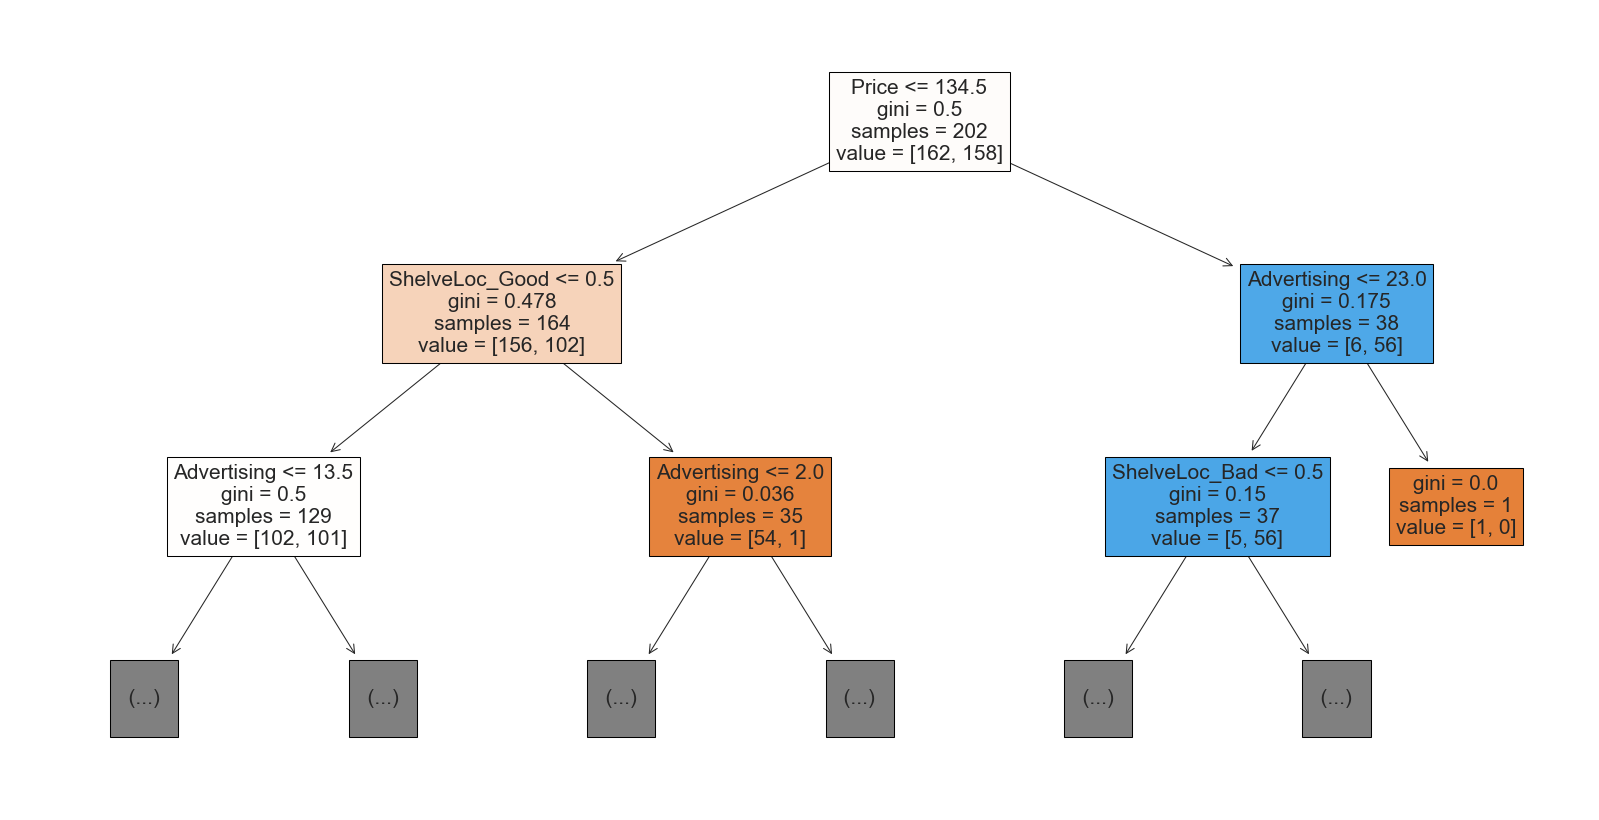

In [113]:
tree.plot_tree(pps_rfc.estimators_[0], feature_names= ['Advertising', 'Price', 'ShelveLoc_Bad', 'ShelveLoc_Good'], 
               filled=True, max_depth=2)
plt.show()

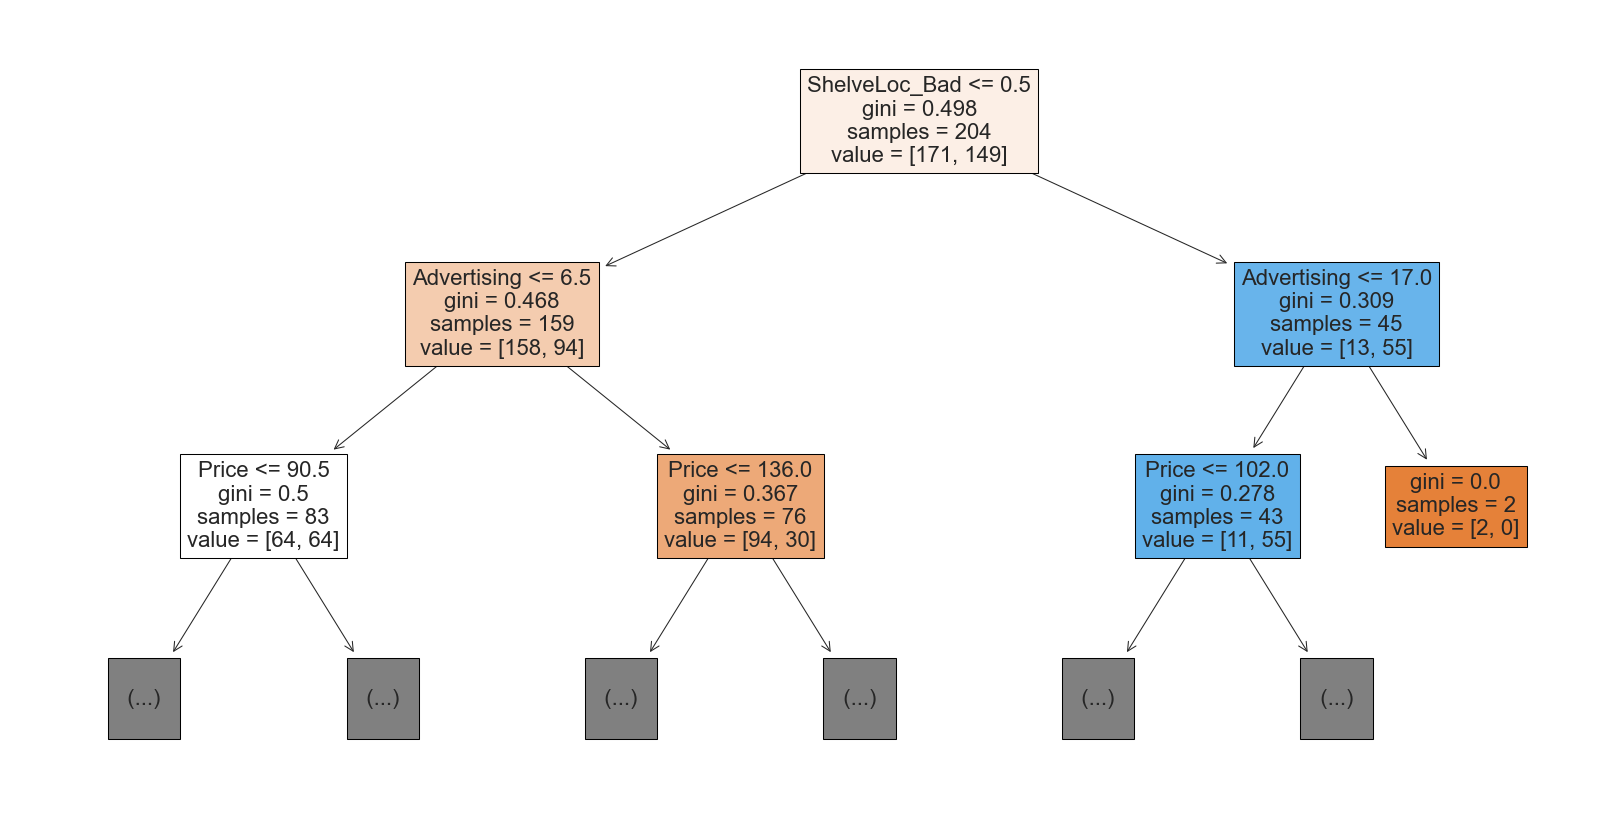

In [114]:
tree.plot_tree(pps_rfc.estimators_[1], feature_names= ['Advertising', 'Price', 'ShelveLoc_Bad', 'ShelveLoc_Good'], 
               filled=True, max_depth=2)
plt.show()

In [90]:
# Creating model by selecting important features of chi2 method.

In [171]:
x = df[['Advertising', 'Price', 'ShelveLoc_Bad', 'ShelveLoc_Good', 'Population', 'Income', 'Age']]
y = df['Sales']

In [172]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=0.2, random_state=42)

In [173]:
chi_rfc = RandomForestClassifier()
chi_rfc.fit(xtrain, ytrain)
yp_chi = chi_rfc.predict(xtest)
yp_chi

array(['high', 'low', 'high', 'low', 'low', 'low', 'high', 'high', 'high',
       'high', 'low', 'low', 'high', 'low', 'high', 'high', 'high',
       'high', 'low', 'low', 'high', 'low', 'low', 'low', 'low', 'low',
       'low', 'high', 'low', 'low', 'high', 'high', 'low', 'low', 'high',
       'low', 'low', 'low', 'high', 'low', 'low', 'low', 'high', 'high',
       'high', 'low', 'low', 'high', 'low', 'low', 'high', 'high', 'low',
       'high', 'low', 'low', 'low', 'high', 'high', 'high', 'high',
       'high', 'high', 'low', 'high', 'low', 'high', 'low', 'low', 'high',
       'low', 'low', 'high', 'low', 'high', 'high', 'low', 'high', 'low',
       'low', 'low', 'high', 'low', 'low', 'high', 'low', 'low', 'high',
       'low', 'low', 'high', 'low', 'low', 'high', 'low', 'low', 'low',
       'high', 'low', 'high', 'low', 'low', 'high', 'high', 'low', 'high',
       'low', 'low', 'low', 'high', 'low', 'low', 'high', 'low', 'low',
       'high', 'high', 'low', 'low', 'high', 'high', 'h

In [174]:
print(classification_report(ytest, yp_chi))

              precision    recall  f1-score   support

        high       0.82      0.63      0.71       164
         low       0.69      0.85      0.76       156

    accuracy                           0.74       320
   macro avg       0.75      0.74      0.74       320
weighted avg       0.75      0.74      0.73       320



In [106]:
chi_rfc.feature_importances_

array([0.10440827, 0.36186105, 0.03310869, 0.10790066, 0.12237369,
       0.12668374, 0.1436639 ])

In [154]:
chi_ig_sel = pd.DataFrame({
    'features' : x.columns,
    'info_gain' : chi_rfc.feature_importances_
})
chi_ig_sel = chi_ig_sel.sort_values(by = 'info_gain', ascending = False)
chi_ig_sel

,features,info_gain
1,Price,0.361861
6,Age,0.143664
5,Income,0.126684
4,Population,0.122374
3,ShelveLoc_Good,0.107901
0,Advertising,0.104408
2,ShelveLoc_Bad,0.033109


In [108]:
x.columns

Index(['Advertising', 'Price', 'ShelveLoc_Bad', 'ShelveLoc_Good', 'Population',
       'Income', 'Age'],
      dtype='object')

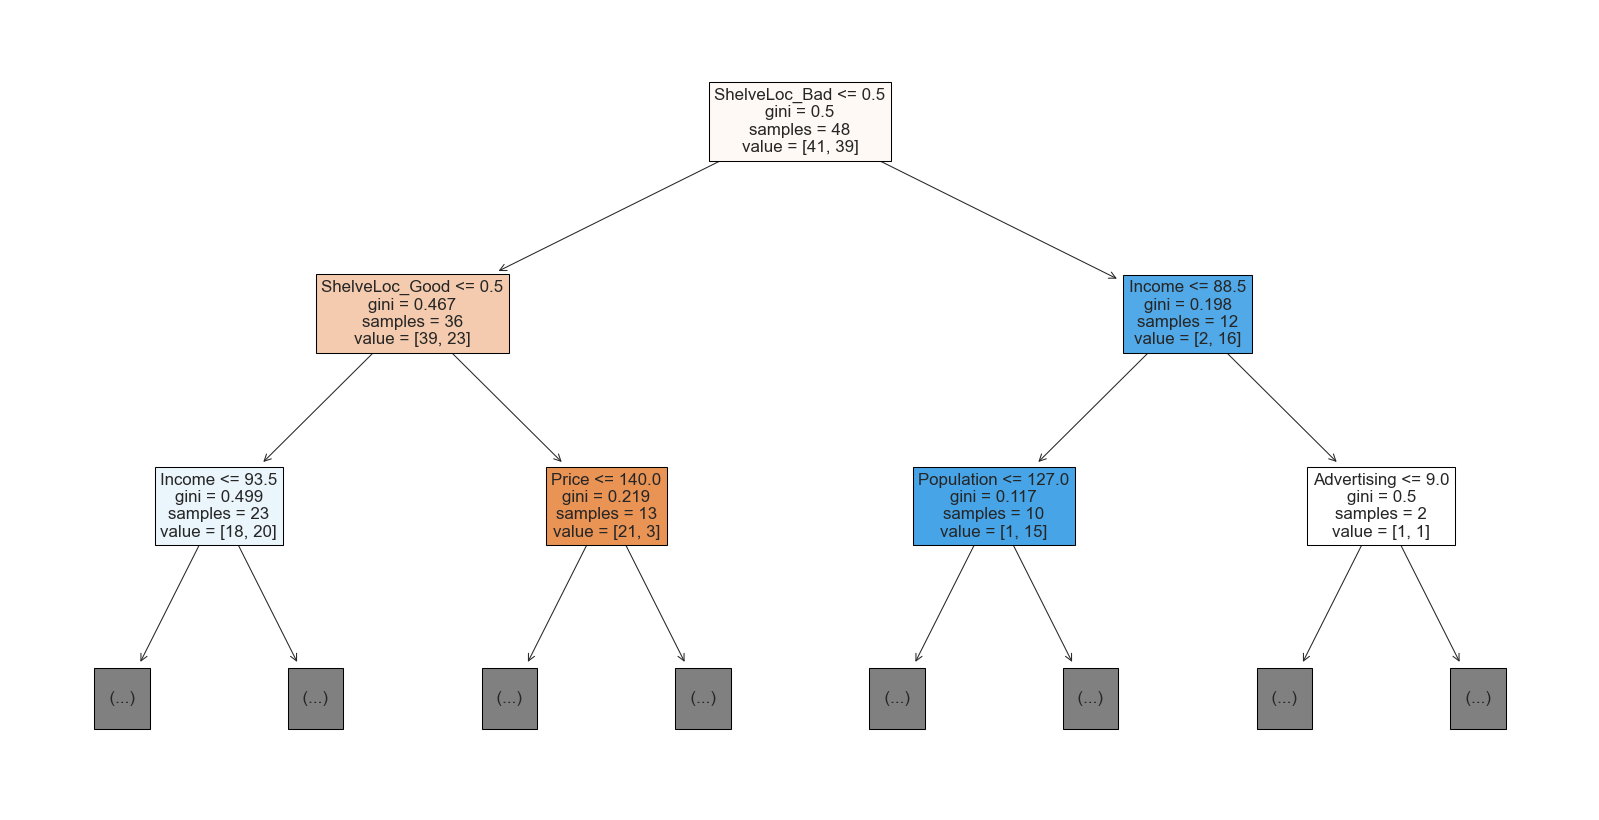

In [109]:
tree.plot_tree(chi_rfc.estimators_[0], feature_names= ['Advertising', 'Price', 'ShelveLoc_Bad', 'ShelveLoc_Good', 'Population',
       'Income', 'Age'], filled=True, max_depth=2)
plt.show()

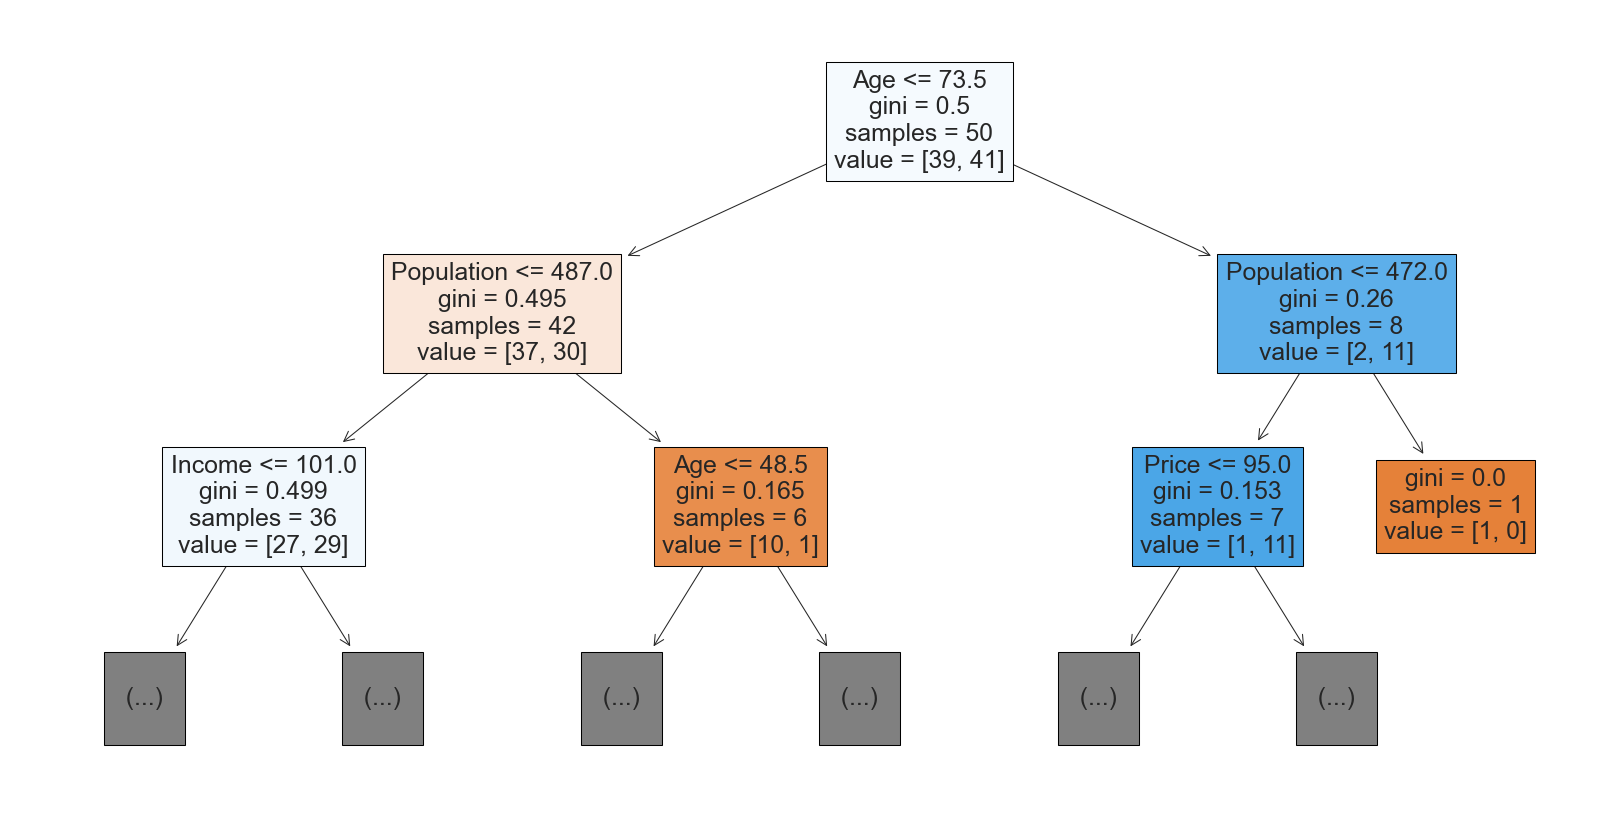

In [110]:
tree.plot_tree(chi_rfc.estimators_[1], feature_names= ['Advertising', 'Price', 'ShelveLoc_Bad', 'ShelveLoc_Good', 'Population',
       'Income', 'Age'], filled=True, max_depth=2)
plt.show()

In [96]:
# Creating model by selecting important features of RFE method.

In [155]:
x = df[['Advertising', 'Price', 'ShelveLoc_Good','ShelveLoc_Bad', 'Population', 'Income', 'Age']]

In [99]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [100]:
rfe_rfc = RandomForestClassifier()
rfe_rfc.fit(xtrain, ytrain)
yp_rfe = rfe_rfc.predict(xtest)
yp_rfe

array(['low', 'low', 'high', 'low', 'low', 'low', 'high', 'low', 'high',
       'high', 'low', 'high', 'high', 'high', 'high', 'high', 'high',
       'high', 'high', 'low', 'high', 'low', 'low', 'high', 'low', 'low',
       'low', 'high', 'low', 'low', 'high', 'high', 'low', 'low', 'high',
       'low', 'low', 'high', 'high', 'low', 'low', 'low', 'high', 'high',
       'high', 'high', 'low', 'high', 'low', 'low', 'high', 'high',
       'high', 'high', 'high', 'low', 'low', 'high', 'high', 'high',
       'high', 'high', 'low', 'low', 'high', 'high', 'high', 'high',
       'low', 'high', 'low', 'high', 'high', 'low', 'low', 'low', 'high',
       'high', 'low', 'low'], dtype=object)

In [101]:
print(classification_report(ytest, yp_rfe))

              precision    recall  f1-score   support

        high       0.77      0.79      0.78        43
         low       0.75      0.73      0.74        37

    accuracy                           0.76        80
   macro avg       0.76      0.76      0.76        80
weighted avg       0.76      0.76      0.76        80



In [105]:
rfe_rfc.feature_importances_

array([0.12693876, 0.28388642, 0.08164769, 0.05357616, 0.12922259,
       0.13648727, 0.18824111])

In [156]:
rfe_ig_sel = pd.DataFrame({
    'features' : x.columns,
    'info_gain' : rfe_rfc.feature_importances_
})
rfe_ig_sel = rfe_ig_sel.sort_values(by = 'info_gain', ascending = False)
rfe_ig_sel

,features,info_gain
1,Price,0.283886
6,Age,0.188241
5,Income,0.136487
4,Population,0.129223
0,Advertising,0.126939
2,ShelveLoc_Good,0.081648
3,ShelveLoc_Bad,0.053576


In [102]:
x.columns

Index(['Advertising', 'Price', 'ShelveLoc_Good', 'ShelveLoc_Bad', 'Population',
       'Income', 'Age'],
      dtype='object')

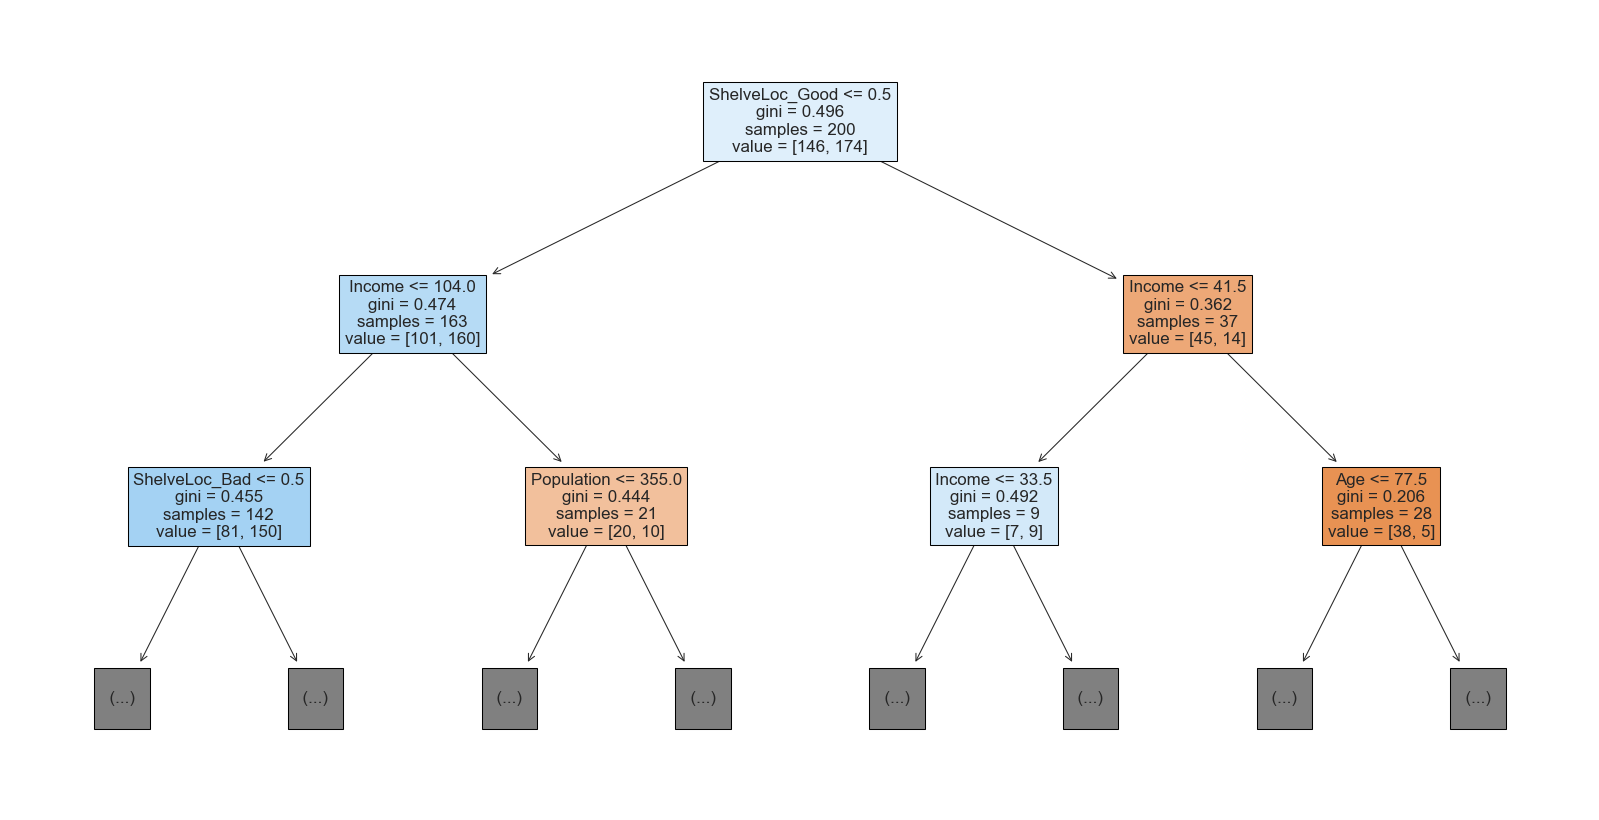

In [104]:
tree.plot_tree(rfe_rfc.estimators_[0], feature_names= ['Advertising', 'Price', 'ShelveLoc_Good', 'ShelveLoc_Bad', 'Population',
       'Income', 'Age'], filled=True, max_depth=2)
plt.show()

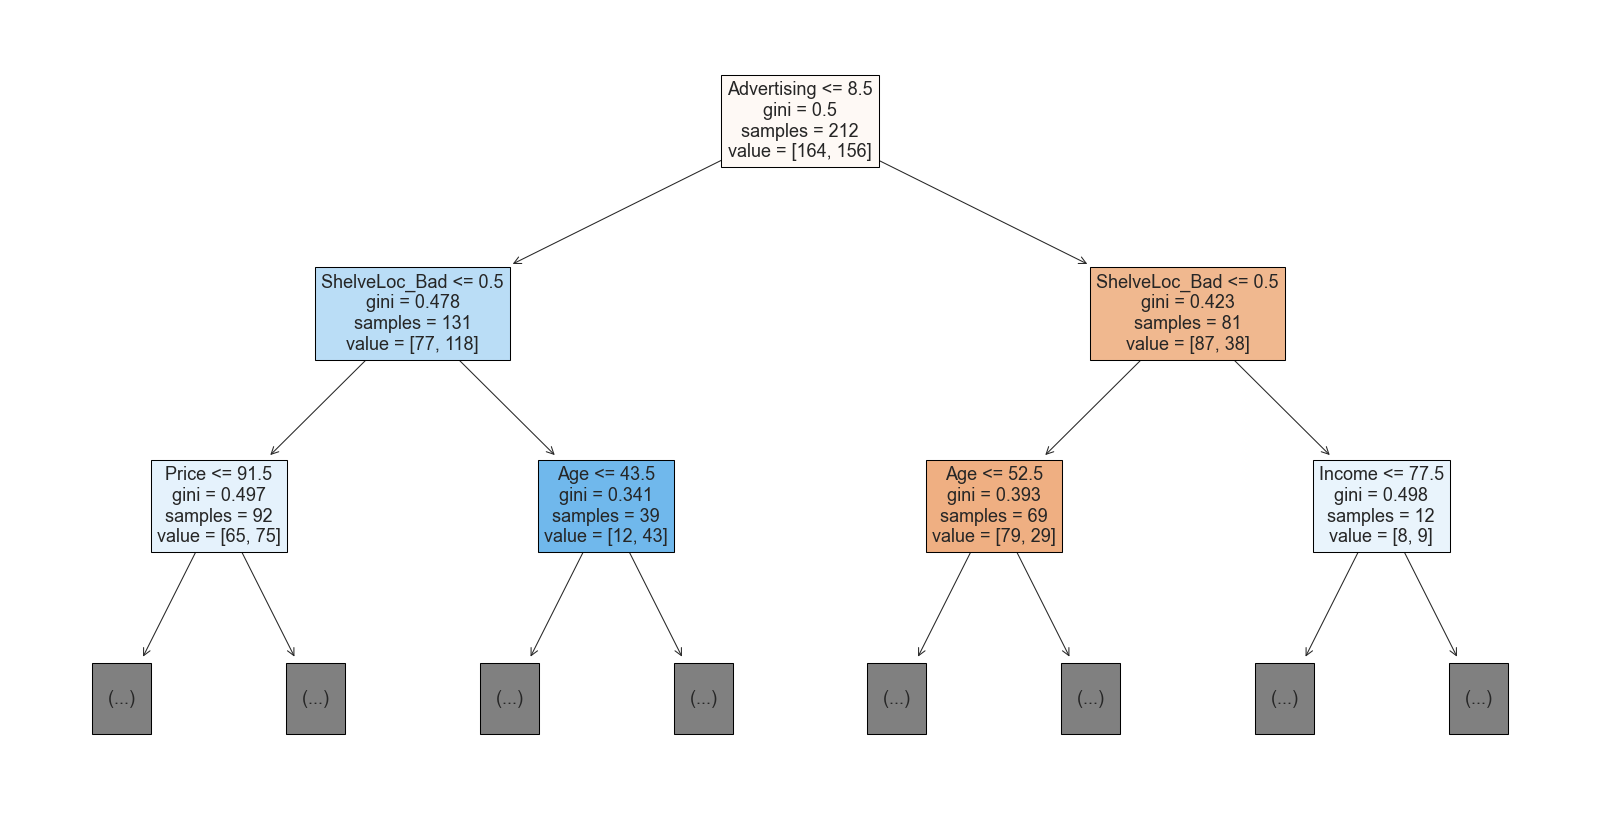

In [115]:
tree.plot_tree(rfe_rfc.estimators_[2], feature_names= ['Advertising', 'Price', 'ShelveLoc_Good', 'ShelveLoc_Bad', 'Population',
       'Income', 'Age'], filled=True, max_depth=2)
plt.show()

In [117]:
# Creating model by selecting important features of tree method.

In [157]:
x = df[['Advertising', 'Price', 'Population', 'Education', 'ShelveLoc_Good', 'CompPrice', 'Income', 'Age']]

In [118]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [119]:
tree_rfc = RandomForestClassifier()
tree_rfc.fit(xtrain, ytrain)
yp_tree = tree_rfc.predict(xtest)
yp_tree

array(['high', 'low', 'high', 'low', 'high', 'low', 'high', 'high',
       'high', 'high', 'low', 'high', 'high', 'low', 'high', 'high',
       'low', 'high', 'high', 'low', 'high', 'low', 'high', 'low', 'high',
       'low', 'low', 'high', 'low', 'low', 'high', 'high', 'low', 'low',
       'high', 'low', 'high', 'high', 'high', 'low', 'low', 'low', 'high',
       'high', 'high', 'high', 'low', 'high', 'low', 'low', 'high',
       'high', 'low', 'high', 'high', 'low', 'low', 'high', 'high',
       'high', 'high', 'high', 'high', 'low', 'low', 'low', 'high', 'low',
       'low', 'high', 'low', 'low', 'high', 'low', 'high', 'high', 'low',
       'high', 'low', 'low'], dtype=object)

In [120]:
print(classification_report(ytest, yp_tree))

              precision    recall  f1-score   support

        high       0.84      0.86      0.85        43
         low       0.83      0.81      0.82        37

    accuracy                           0.84        80
   macro avg       0.84      0.84      0.84        80
weighted avg       0.84      0.84      0.84        80



In [121]:
tree_rfc.feature_importances_

array([0.11794895, 0.25713162, 0.10849748, 0.05734253, 0.08359099,
       0.12962993, 0.09868857, 0.14716993])

In [158]:
tree_ig_sel = pd.DataFrame({
    'features' : x.columns,
    'info_gain' : tree_rfc.feature_importances_
})
tree_ig_sel = tree_ig_sel.sort_values(by = 'info_gain', ascending = False)
tree_ig_sel

,features,info_gain
1,Price,0.257132
7,Age,0.147170
5,CompPrice,0.129630
0,Advertising,0.117949
2,Population,0.108497
6,Income,0.098689
4,ShelveLoc_Good,0.083591
3,Education,0.057343


In [122]:
x.columns

Index(['Advertising', 'Price', 'Population', 'Education', 'ShelveLoc_Good',
       'CompPrice', 'Income', 'Age'],
      dtype='object')

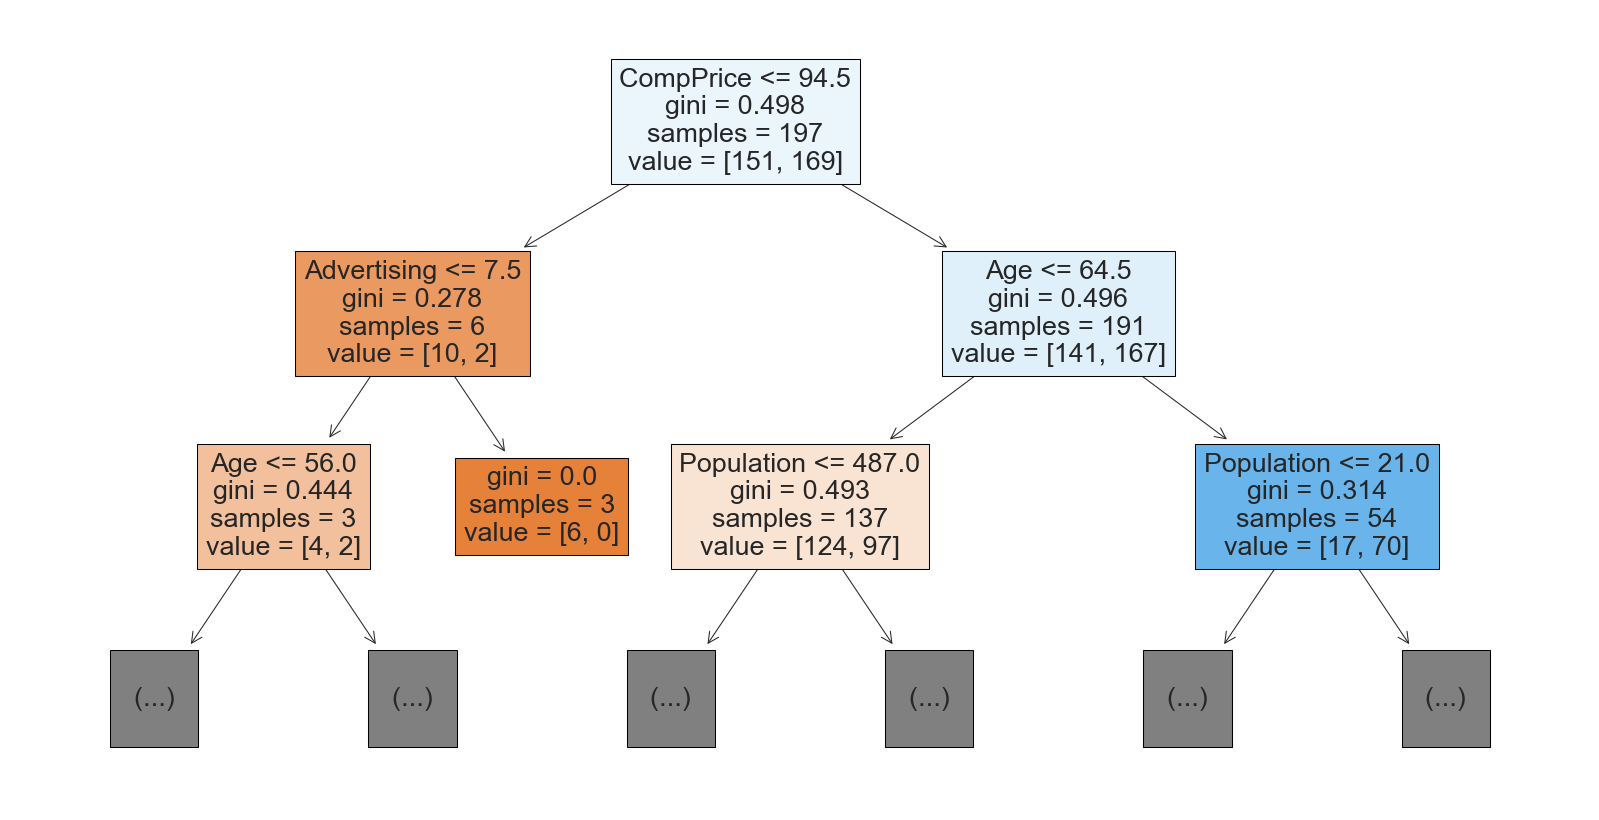

In [123]:
tree.plot_tree(tree_rfc.estimators_[2], feature_names= ['Advertising', 'Price', 'Population', 'Education', 'ShelveLoc_Good',
       'CompPrice', 'Income', 'Age'], filled=True, max_depth=2)
plt.show()

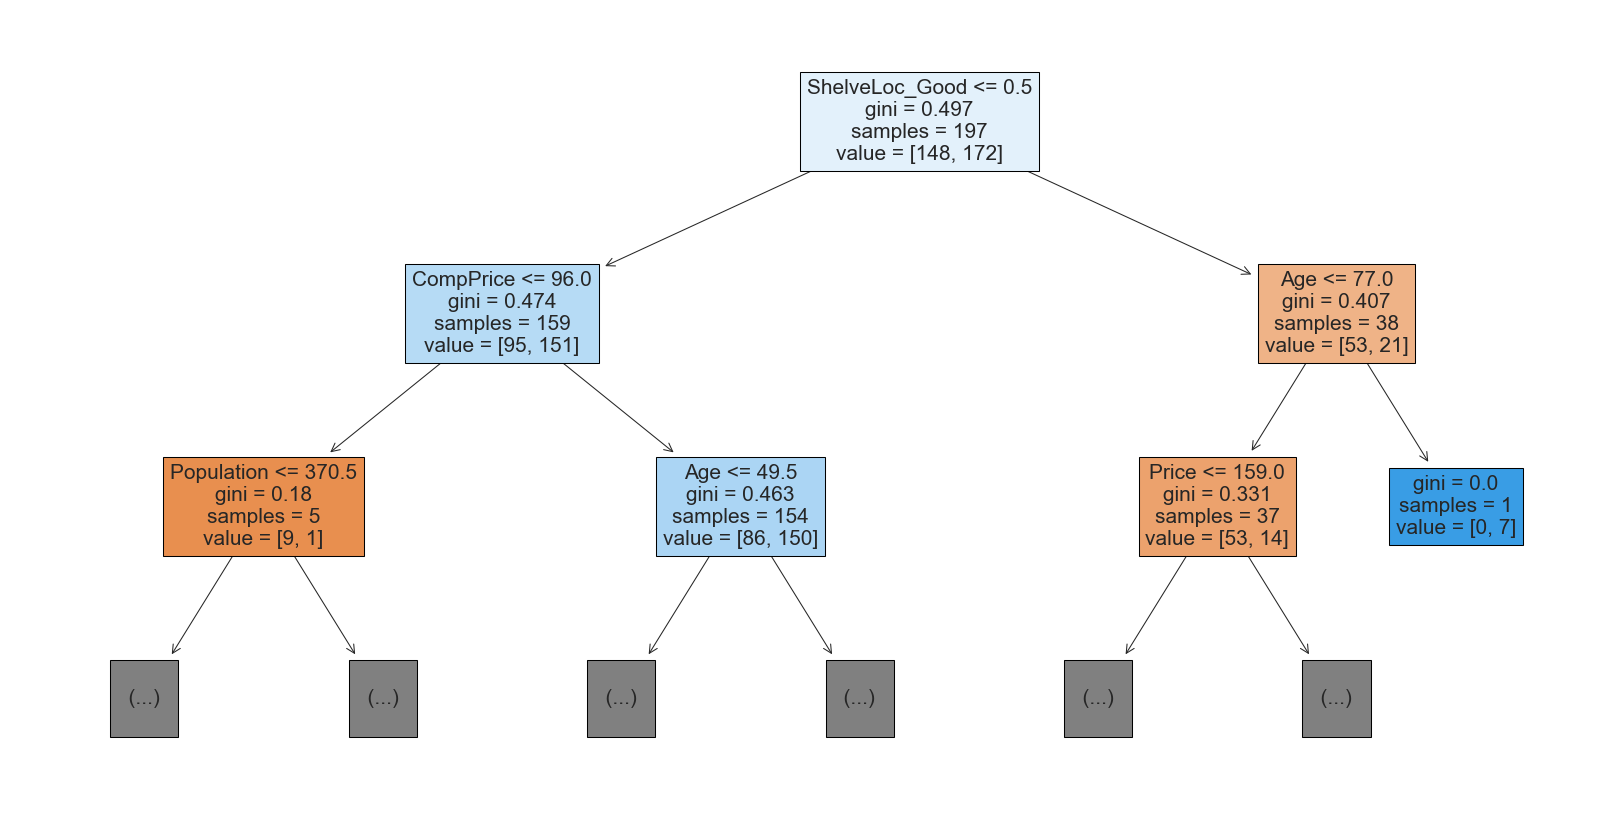

In [124]:
tree.plot_tree(tree_rfc.estimators_[1], feature_names= ['Advertising', 'Price', 'Population', 'Education', 'ShelveLoc_Good',
       'CompPrice', 'Income', 'Age'], filled=True, max_depth=2)
plt.show()

In [159]:
print(classification_report(ytest, yp))

              precision    recall  f1-score   support

        high       0.84      0.84      0.84        43
         low       0.81      0.81      0.81        37

    accuracy                           0.82        80
   macro avg       0.82      0.82      0.82        80
weighted avg       0.82      0.82      0.82        80



In [160]:
print(classification_report(ytest, yp_pps))

              precision    recall  f1-score   support

        high       0.82      0.77      0.80        43
         low       0.75      0.81      0.78        37

    accuracy                           0.79        80
   macro avg       0.79      0.79      0.79        80
weighted avg       0.79      0.79      0.79        80



In [175]:
print(classification_report(ytest, yp_chi))

              precision    recall  f1-score   support

        high       0.82      0.63      0.71       164
         low       0.69      0.85      0.76       156

    accuracy                           0.74       320
   macro avg       0.75      0.74      0.74       320
weighted avg       0.75      0.74      0.73       320



In [164]:
print(classification_report(ytest, yp_rfe))

              precision    recall  f1-score   support

        high       0.77      0.79      0.78        43
         low       0.75      0.73      0.74        37

    accuracy                           0.76        80
   macro avg       0.76      0.76      0.76        80
weighted avg       0.76      0.76      0.76        80



In [165]:
print(classification_report(ytest, yp_tree))

              precision    recall  f1-score   support

        high       0.84      0.86      0.85        43
         low       0.83      0.81      0.82        37

    accuracy                           0.84        80
   macro avg       0.84      0.84      0.84        80
weighted avg       0.84      0.84      0.84        80



In [179]:
rfc_ig_sel

,features,info_gain
4,Price,0.241323
5,Age,0.128605
0,CompPrice,0.101389
3,Population,0.098846
1,Income,0.094800
2,Advertising,0.090664
8,ShelveLoc_Good,0.072160
6,Education,0.056038
7,ShelveLoc_Bad,0.042233
9,ShelveLoc_Medium,0.023842


In [167]:
pps_ig_sel

,features,info_gain
1,Price,0.573626
0,Advertising,0.258486
3,ShelveLoc_Good,0.105420
2,ShelveLoc_Bad,0.062468


In [168]:
chi_ig_sel

,features,info_gain
1,Price,0.361861
6,Age,0.143664
5,Income,0.126684
4,Population,0.122374
3,ShelveLoc_Good,0.107901
0,Advertising,0.104408
2,ShelveLoc_Bad,0.033109


In [169]:
rfe_ig_sel

,features,info_gain
1,Price,0.283886
6,Age,0.188241
5,Income,0.136487
4,Population,0.129223
0,Advertising,0.126939
2,ShelveLoc_Good,0.081648
3,ShelveLoc_Bad,0.053576


In [170]:
tree_ig_sel

,features,info_gain
1,Price,0.257132
7,Age,0.147170
5,CompPrice,0.129630
0,Advertising,0.117949
2,Population,0.108497
6,Income,0.098689
4,ShelveLoc_Good,0.083591
3,Education,0.057343


By checking all the common features in all Information Gain Tables of models, we can conclude that-
- Most Important attributes causing High Sale are = Pice and Advertising
- Important attributes other than Price and Advertising = ShelveLoc, Population, Age, CompPrice and Income
- Attrubutes not affetcting sales = Urban and US